<a href="https://colab.research.google.com/github/MWSAM7763/DataScience/blob/main/VKR_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Импортируем все необходимые библиотеки для исследования
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
sns.set_style('darkgrid')

In [ ]:
#Cмонтируем весь Google Disk в Colab:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Загрузка данных
#Загружаем первый датасет из файла 'X_bp.xlsx'
df_bp = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/ВКР/data/X_bp.xlsx')
# Загружаем второй датасет 'X_nup.xlsx'
df_nup = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/ВКР/data/X_nup.xlsx')

In [ ]:
#Смотрим данные
df_bp.head().T

In [ ]:
df_nup.head()

In [ ]:
#Изучаем данные
df_bp.describe().T

In [ ]:
df_nup.describe()

In [ ]:
#Делаем объединение данных по индексу - тип объединения INNER
df = pd.merge(df_bp, df_nup, how='inner', on='Unnamed: 0')
df.head().T

0            1            2  \
Unnamed: 0                               0.000000     1.000000     2.000000   
Соотношение матрица-наполнитель          1.857143     1.857143     1.857143   
Плотность, кг/м3                      2030.000000  2030.000000  2030.000000   
модуль упругости, ГПа                  738.736842   738.736842   738.736842   
Количество отвердителя, м.%             30.000000    50.000000    49.900000   
Содержание эпоксидных групп,%_2         22.267857    23.750000    33.000000   
Температура вспышки, С_2               100.000000   284.615385   284.615385   
Поверхностная плотность, г/м2          210.000000   210.000000   210.000000   
Модуль упругости при растяжении, ГПа    70.000000    70.000000    70.000000   
Прочность при растяжении, МПа         3000.000000  3000.000000  3000.000000   
Потребление смолы, г/м2                220.000000   220.000000   220.000000   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              4.000000     4.000000     4.000000   
Плотность нашивки                       57.000000    60.000000    70.000000   

                                                3            4  
Unnamed: 0                               3.000000     4.000000  
Соотношение матрица-наполнитель          1.857143     2.771331  
Плотность, кг/м3                      2030.000000  2030.000000  
модуль упругости, ГПа                  738.736842   753.000000  
Количество отвердителя, м.%            129.000000   111.860000  
Содержание эпоксидных групп,%_2         21.250000    22.267857  
Температура вспышки, С_2               300.000000   284.615385  
Поверхностная плотность, г/м2          210.000000   210.000000  
Модуль упругости при растяжении, ГПа    70.000000    70.000000  
Прочность при растяжении, МПа         3000.000000  3000.000000  
Потребление смолы, г/м2                220.000000   220.000000  
Угол нашивки, град                       0.000000     0.000000  
Шаг нашивки                              5.000000     5.000000  
Плотность нашивки                       47.000000    57.000000

In [ ]:
#Удаляем первый столбец
del df['Unnamed: 0']

In [ ]:
#Cмотрим количество колонок и столбцов
df.shape
# Итоговый датасет имеет 13 столбцов и 1023 строки.
# 17 строк из таблицы X_nup были отброшены в процессе сшивки данных

(1023, 13)

In [ ]:
#Изучим данные
df.describe().T

In [ ]:
#Просмотрим информацию о датасете, проверим тип данных в каждом столбце (типы признаков)
df.info()
#Все переменные, кроме "Угол нашивки, град" содержат значения float64. Переменные "Угол нашивки, град" содержат значения int64.
#Качественные характеристики отсутствуют. Пропусков не имеется. Ни одна из записей не является NaN.
#Таким образом очистка данных не требуется. Объединенный датасет имеет  1023 строки.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [ ]:
#Поиск уникальных значений с помощью функции nunique
df.nunique()
#В столбце "Угол нашивки, град" всего 2 значения.

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [ ]:
#Так как кол-во уникальных значений в колонке "Угол нашивки, град" равно 2, можем привести данные в этой колонке к значениям 0 и 1 c помощью метода LabelEncoder
labelencoder = LabelEncoder()
df['Угол нашивки'] = labelencoder.fit_transform(df['Угол нашивки, град'])
df.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
0                    220.0                   0          4.0   
1                    220.0                   0          4.0   
2                    220.0                   0          4.0   
3                    220.0                   0          5.0   
4                    220.0                   0          5.0   

   Плотность нашивки  Угол нашивки  
0               57.0             0  
1               60.0             0  
2               70.0             0  
3               47.0             0  
4               57.0             0

In [ ]:
# Проверим  наличие пропусков
df.isnull().sum()
# Пропущенных данных нет = нулевых значений нет, очистка не требуется

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
Угол нашивки                            0
dtype: int64

In [ ]:
#Удаляем лишний столбец 'Угол нашивки, град' 
del df['Угол нашивки, град']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Шаг нашивки                           1023 non-null   float64
 11  Плотность нашивки

In [ ]:
# Проверим датасет на дубликаты
df.duplicated().sum()
#Дубликатов нет

0

In [ ]:
# Выведем средние значения
df.mean()

Соотношение матрица-наполнитель            2.930366
Плотность, кг/м3                        1975.734888
модуль упругости, ГПа                    739.923233
Количество отвердителя, м.%              110.570769
Содержание эпоксидных групп,%_2           22.244390
Температура вспышки, С_2                 285.882151
Поверхностная плотность, г/м2            482.731833
Модуль упругости при растяжении, ГПа      73.328571
Прочность при растяжении, МПа           2466.922843
Потребление смолы, г/м2                  218.423144
Шаг нашивки                                6.899222
Плотность нашивки                         57.153929
Угол нашивки                               0.491691
dtype: float64

In [ ]:
#Выведем медианные значения
df.median()

Соотношение матрица-наполнитель            2.906878
Плотность, кг/м3                        1977.621657
модуль упругости, ГПа                    739.664328
Количество отвердителя, м.%              110.564840
Содержание эпоксидных групп,%_2           22.230744
Температура вспышки, С_2                 285.896812
Поверхностная плотность, г/м2            451.864365
Модуль упругости при растяжении, ГПа      73.268805
Прочность при растяжении, МПа           2459.524526
Потребление смолы, г/м2                  219.198882
Шаг нашивки                                6.916144
Плотность нашивки                         57.341920
Угол нашивки                               0.000000
dtype: float64

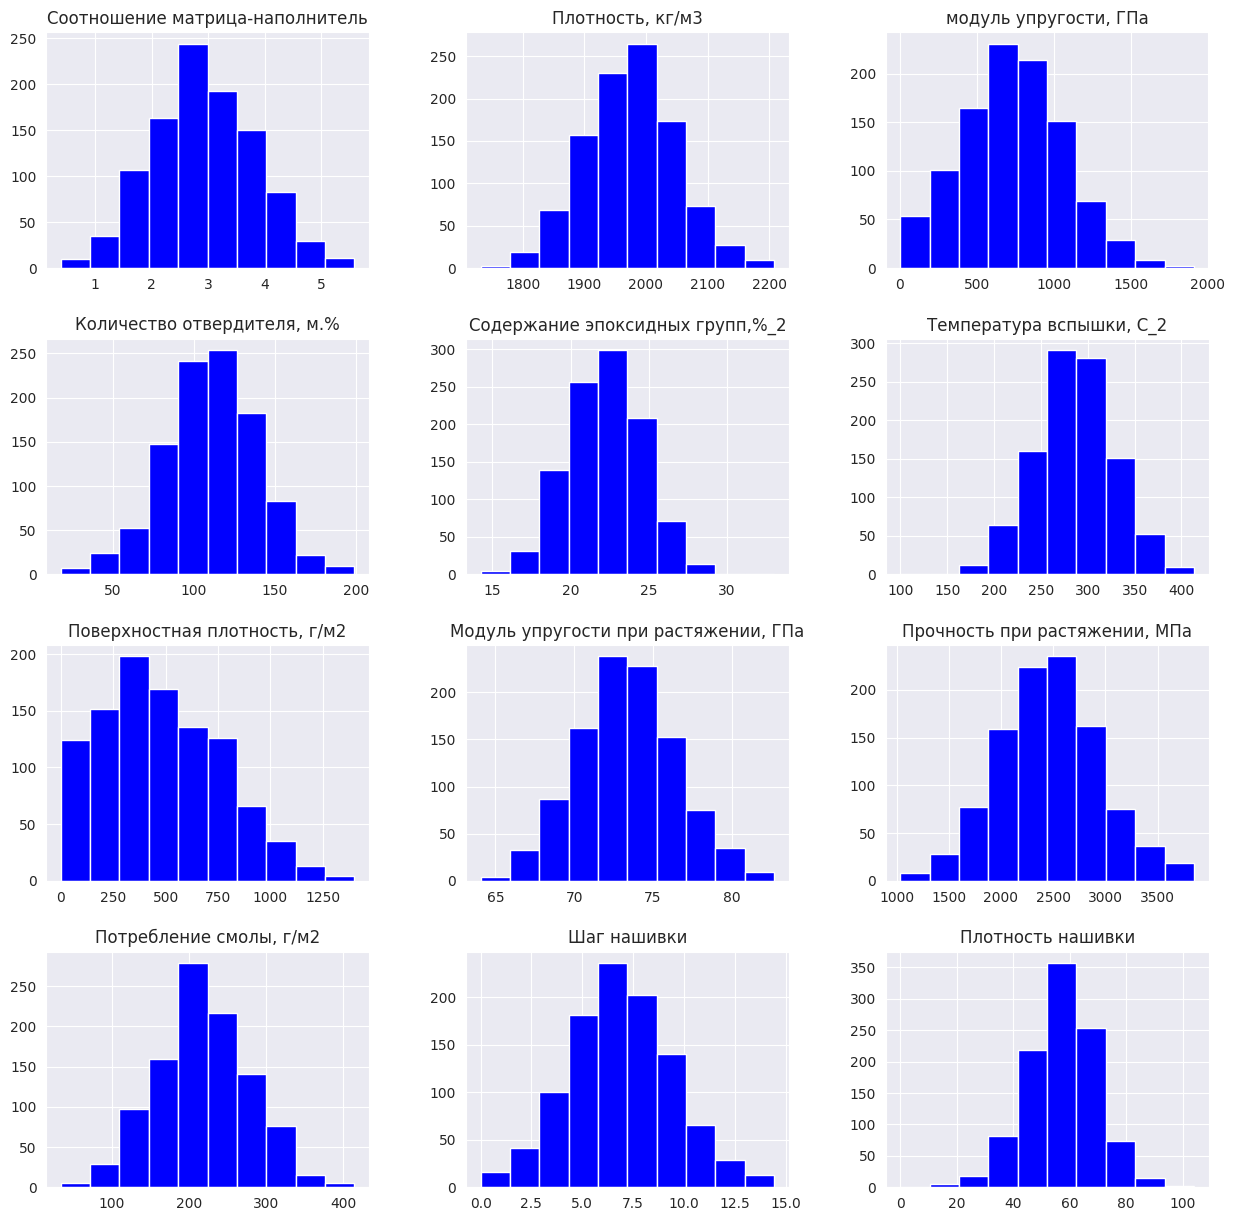

In [ ]:
# Построим гистограммы распределения каждой из переменных без нормализации и исключения выбросов
df.hist(figsize = (15,15), color = "b")
plt.show()

In [ ]:
#Создадим переменную для названия всех столбцов. 
column_names = df.columns


<function matplotlib.pyplot.show(close=None, block=None)>

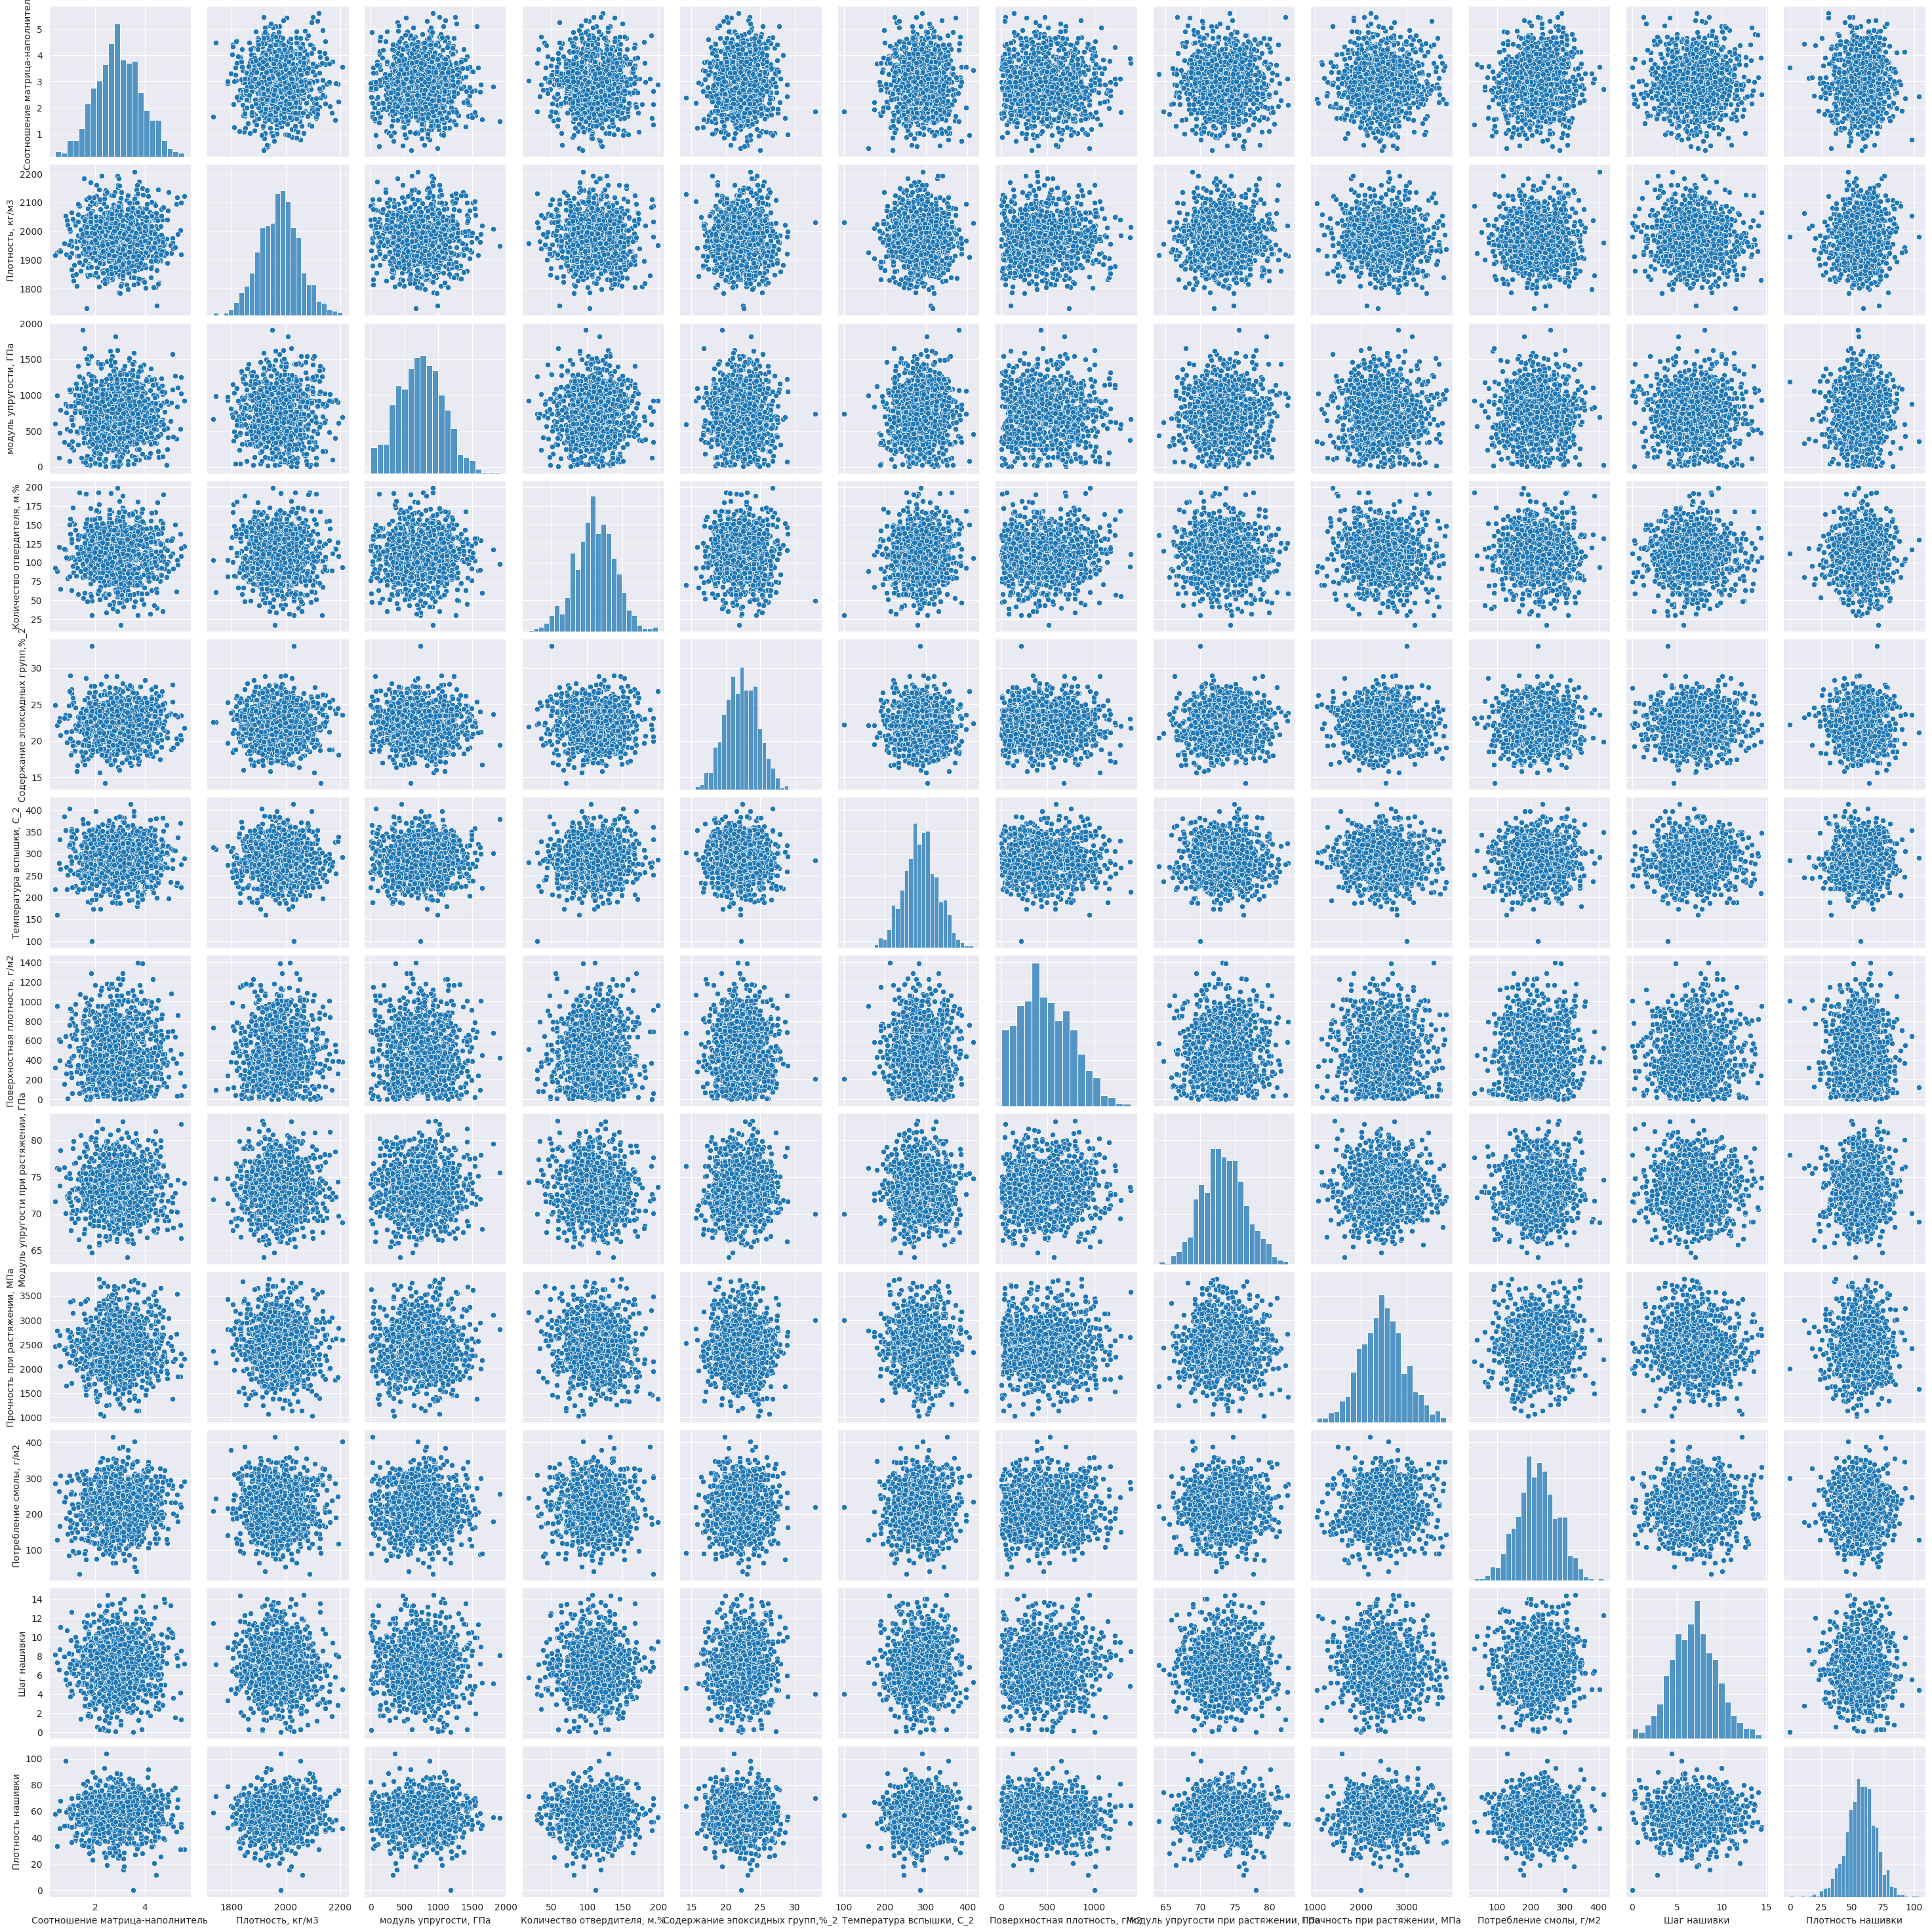

In [ ]:
#Нарисуем попарные графики рассеяния точек
sns.pairplot(df[column_names])
plt.show

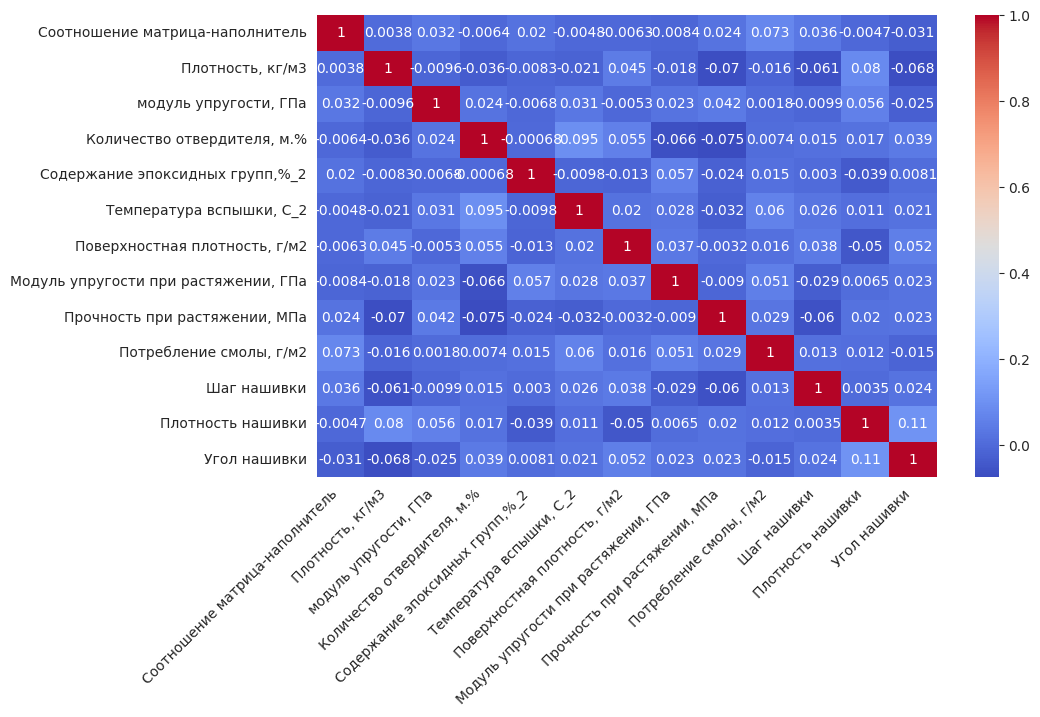

In [ ]:
# Матрица корреляции
correlation_matrix = df.corr()
# Выводим признаки на тепловую карту
plt.figure(figsize= (10, 6))
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.show()

Вывод: максимальная корреляция между Плотностью нашивки и углом нашивки и составляет 0.11, что говорит об отсутствии зависимости между этими данными. Корреляция между всеми параметрами очень близка к 0, что говорит об отсутствии корреляционных связей между переменными.

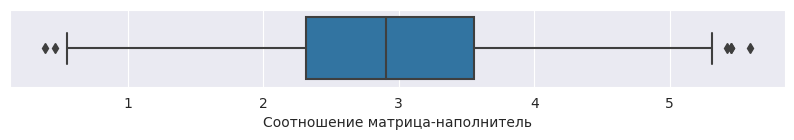

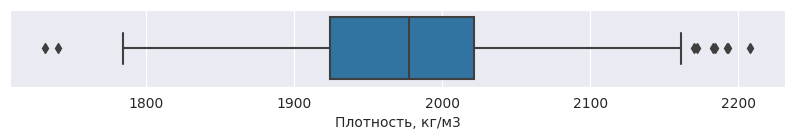

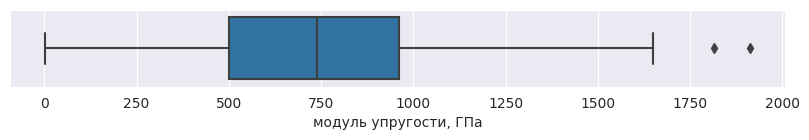

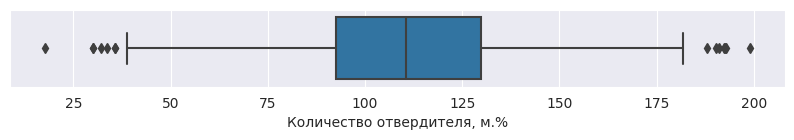

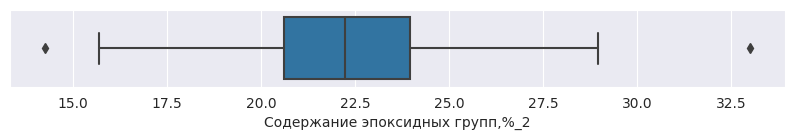

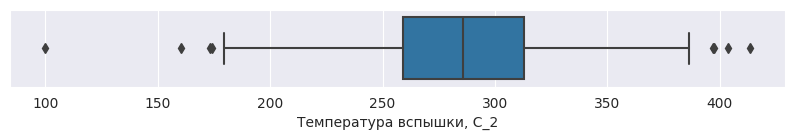

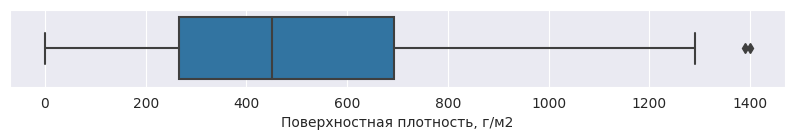

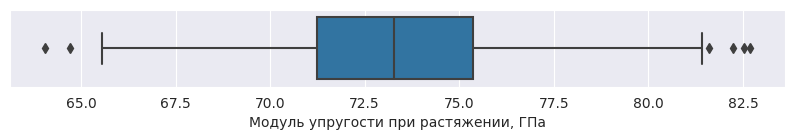

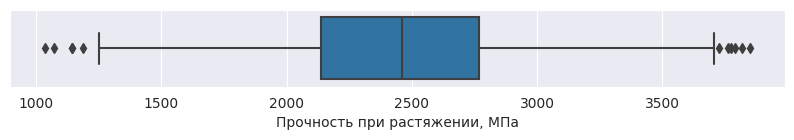

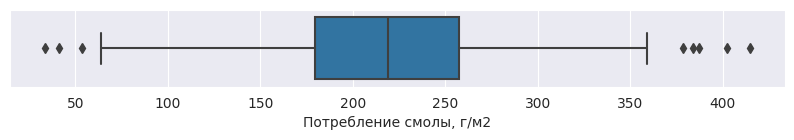

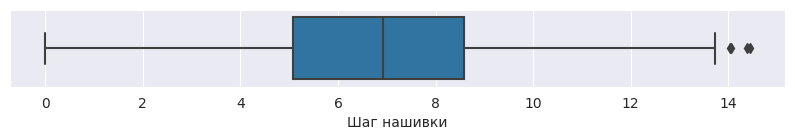

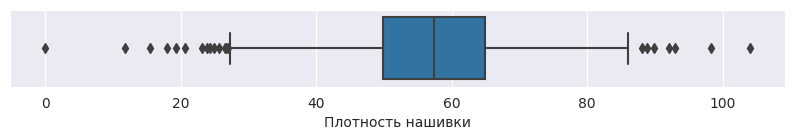

In [ ]:
# Поиск аномалий и выбросов
#Визулизация данных с помощью boxplot
for col in df.columns:
  plt.figure(figsize=(10,1))
  sns.boxplot(x=df[col])
  plt.show()

In [ ]:
#Поиск уникальных значений с помощью функции nunique
df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [ ]:
#Для очистки данных создадим копию датасета
df_clean = df.copy()

In [ ]:
#Определим количество выбросов с помощью квартильного анализа
# Вычисляем квартили и межквартильный диапазон для всех столбцов
q1 = df_clean.quantile(0.25)
q3 = df_clean.quantile(0.75)
iqr = q3 - q1

# Вычисляем нижнюю и верхнюю границы для всех столбцов
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

# Находим выбросы для всех столбцов
outliers = (df_clean < lower_bound) | (df_clean > upper_bound)

# Считаем количество выбросов в каждом столбце
print(outliers.sum())

Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Шаг нашивки                              4
Плотность нашивки                       21
dtype: int64


In [ ]:
#Выведем значения индексов выбросов
for col in outliers.columns:
  print(col, outliers.index [outliers[col] > 0].tolist())

Соотношение матрица-наполнитель [237, 284, 378, 505, 673, 877]
Плотность, кг/м3 [100, 224, 251, 264, 317, 499, 626, 873, 918]
модуль упругости, ГПа [592, 770]
Количество отвердителя, м.% [0, 94, 208, 257, 412, 448, 495, 503, 511, 535, 800, 819, 867, 958]
Содержание эпоксидных групп,%_2 [2, 298]
Температура вспышки, С_2 [0, 175, 322, 378, 649, 721, 791, 938]
Поверхностная плотность, г/м2 [692, 718]
Модуль упругости при растяжении, ГПа [52, 135, 375, 505, 636, 1000]
Прочность при растяжении, МПа [99, 106, 172, 185, 262, 270, 318, 387, 695, 719, 858]
Потребление смолы, г/м2 [100, 119, 211, 471, 503, 593, 787, 800]
Шаг нашивки [114, 392, 446, 529]
Плотность нашивки [19, 41, 74, 117, 140, 165, 193, 233, 279, 309, 348, 369, 383, 438, 461, 464, 465, 466, 481, 496, 508]


In [ ]:
#Удаляем выбросы
df_clean = df_clean[~outliers.any(axis=1)]
df_clean.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 1 to 1022
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       936 non-null    float64
 1   Плотность, кг/м3                      936 non-null    float64
 2   модуль упругости, ГПа                 936 non-null    float64
 3   Количество отвердителя, м.%           936 non-null    float64
 4   Содержание эпоксидных групп,%_2       936 non-null    float64
 5   Температура вспышки, С_2              936 non-null    float64
 6   Поверхностная плотность, г/м2         936 non-null    float64
 7   Модуль упругости при растяжении, ГПа  936 non-null    float64
 8   Прочность при растяжении, МПа         936 non-null    float64
 9   Потребление смолы, г/м2               936 non-null    float64
 10  Шаг нашивки                           936 non-null    float64
 11  Плотность нашивки 

In [ ]:
#Вторая проверка на выбросы
q1 = df_clean.quantile(0.25)
q3 = df_clean.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
outliers = (df_clean < lower_bound) | (df_clean > upper_bound)
outliers_count = outliers.sum()
print(outliers_count)


Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   1
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    1
Прочность при растяжении, МПа           4
Потребление смолы, г/м2                 1
Шаг нашивки                             0
Плотность нашивки                       3
dtype: int64


In [ ]:
#Второй раз удаляем выбросы
df_clean = df_clean[~outliers.any(axis=1)]
df_clean.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [ ]:
#Выведем значения индексов выбросов
for col in outliers.columns:
  print(col, outliers.index [outliers[col] > 0].tolist())

Соотношение матрица-наполнитель []
Плотность, кг/м3 []
модуль упругости, ГПа [741]
Количество отвердителя, м.% []
Содержание эпоксидных групп,%_2 []
Температура вспышки, С_2 []
Поверхностная плотность, г/м2 []
Модуль упругости при растяжении, ГПа [706]
Прочность при растяжении, МПа [24, 654, 897, 1008]
Потребление смолы, г/м2 [541]
Шаг нашивки []
Плотность нашивки [261, 389, 426]


In [ ]:
#Третья проверка на выбросы
q1 = df_clean.quantile(0.25)
q3 = df_clean.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
outliers = (df_clean < lower_bound) | (df_clean > upper_bound)
outliers_count = outliers.sum()
print(outliers_count)

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           2
Потребление смолы, г/м2                 1
Шаг нашивки                             0
Плотность нашивки                       1
dtype: int64


In [ ]:
#Третий раз удаляем выбросы
df_clean = df_clean[~outliers.any(axis=1)]
df_clean.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [ ]:
#Четвертая проверка на выбросы
q1 = df_clean.quantile(0.25)
q3 = df_clean.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
outliers = (df_clean < lower_bound) | (df_clean > upper_bound)
outliers_count = outliers.sum()
print(outliers_count)

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64


Вывод: данные очищены

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 922 entries, 1 to 1022
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       922 non-null    float64
 1   Плотность, кг/м3                      922 non-null    float64
 2   модуль упругости, ГПа                 922 non-null    float64
 3   Количество отвердителя, м.%           922 non-null    float64
 4   Содержание эпоксидных групп,%_2       922 non-null    float64
 5   Температура вспышки, С_2              922 non-null    float64
 6   Поверхностная плотность, г/м2         922 non-null    float64
 7   Модуль упругости при растяжении, ГПа  922 non-null    float64
 8   Прочность при растяжении, МПа         922 non-null    float64
 9   Потребление смолы, г/м2               922 non-null    float64
 10  Шаг нашивки                           922 non-null    float64
 11  Плотность нашивки 

В датасете осталось 922 записи

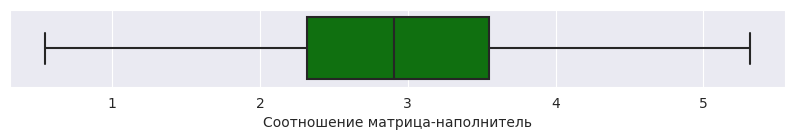

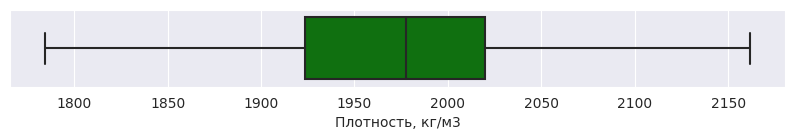

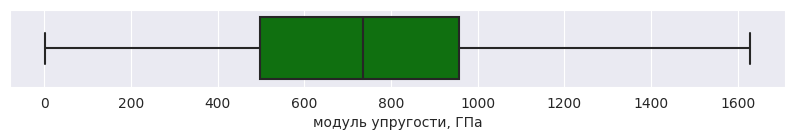

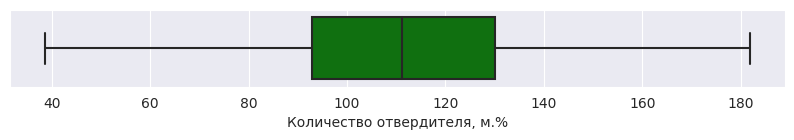

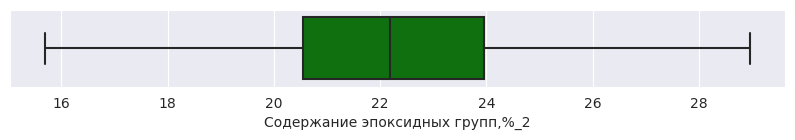

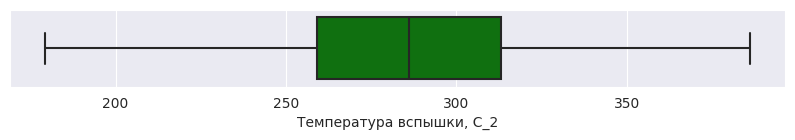

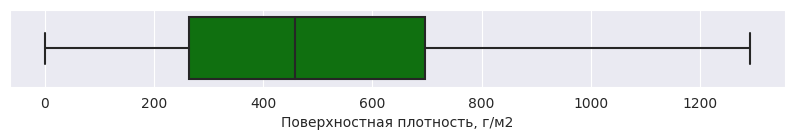

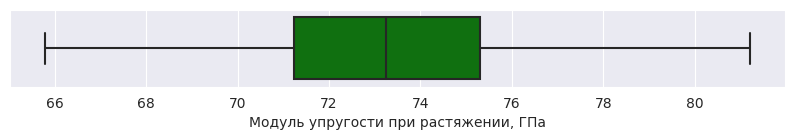

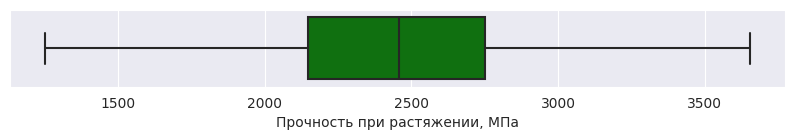

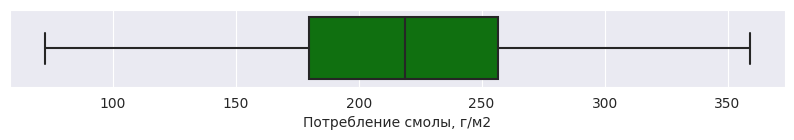

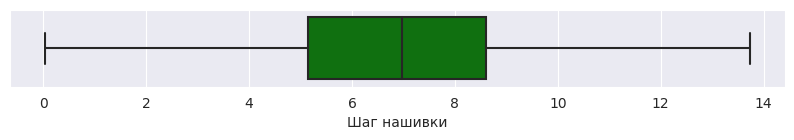

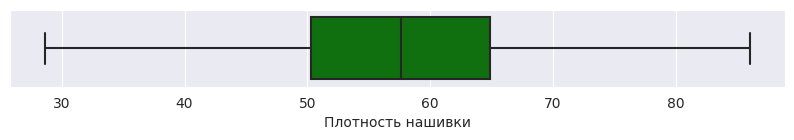

In [ ]:
#Визулизация чистых данных с помощью boxplot
for col in df_clean.columns:
  plt.figure(figsize=(10,1),  )
  sns.boxplot(x=df_clean[col], color = 'g')
  plt.show()

In [ ]:
# Очистка выбросов методом Z score
from scipy import stats
df_clean_z = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)].copy()
df_clean_z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 1 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       999 non-null    float64
 1   Плотность, кг/м3                      999 non-null    float64
 2   модуль упругости, ГПа                 999 non-null    float64
 3   Количество отвердителя, м.%           999 non-null    float64
 4   Содержание эпоксидных групп,%_2       999 non-null    float64
 5   Температура вспышки, С_2              999 non-null    float64
 6   Поверхностная плотность, г/м2         999 non-null    float64
 7   Модуль упругости при растяжении, ГПа  999 non-null    float64
 8   Прочность при растяжении, МПа         999 non-null    float64
 9   Потребление смолы, г/м2               999 non-null    float64
 10  Шаг нашивки                           999 non-null    float64
 11  Плотность нашивки 

In [ ]:
#Выведем значения несоответствующие Z core
df[(np.abs(stats.zscore(df)) > 3).any(axis = 1)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 918
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       24 non-null     float64
 1   Плотность, кг/м3                      24 non-null     float64
 2   модуль упругости, ГПа                 24 non-null     float64
 3   Количество отвердителя, м.%           24 non-null     float64
 4   Содержание эпоксидных групп,%_2       24 non-null     float64
 5   Температура вспышки, С_2              24 non-null     float64
 6   Поверхностная плотность, г/м2         24 non-null     float64
 7   Модуль упругости при растяжении, ГПа  24 non-null     float64
 8   Прочность при растяжении, МПа         24 non-null     float64
 9   Потребление смолы, г/м2               24 non-null     float64
 10  Шаг нашивки                           24 non-null     float64
 11  Плотность нашивки   

In [ ]:
#Визулизация ощищенных данных Z core с помощью boxplot
for col in column_names:
  df_clean_z.boxplot(column=[col])
  plt.show()

In [ ]:
# Очистка выбросов методом Z score второй раз
from scipy import stats
df_clean_z = df_clean_z[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df_clean_z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 1 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       999 non-null    float64
 1   Плотность, кг/м3                      999 non-null    float64
 2   модуль упругости, ГПа                 999 non-null    float64
 3   Количество отвердителя, м.%           999 non-null    float64
 4   Содержание эпоксидных групп,%_2       999 non-null    float64
 5   Температура вспышки, С_2              999 non-null    float64
 6   Поверхностная плотность, г/м2         999 non-null    float64
 7   Модуль упругости при растяжении, ГПа  999 non-null    float64
 8   Прочность при растяжении, МПа         999 non-null    float64
 9   Потребление смолы, г/м2               999 non-null    float64
 10  Шаг нашивки                           999 non-null    float64
 11  Плотность нашивки 

<ipython-input-52-4dc8a52dece5>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean_z = df_clean_z[(np.abs(stats.zscore(df)) < 3).all(axis=1)]


In [ ]:
#Выведем значения несоответствующие Z core
df_clean_z[(np.abs(stats.zscore(df)) >= 3).any(axis = 1)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       0 non-null      float64
 1   Плотность, кг/м3                      0 non-null      float64
 2   модуль упругости, ГПа                 0 non-null      float64
 3   Количество отвердителя, м.%           0 non-null      float64
 4   Содержание эпоксидных групп,%_2       0 non-null      float64
 5   Температура вспышки, С_2              0 non-null      float64
 6   Поверхностная плотность, г/м2         0 non-null      float64
 7   Модуль упругости при растяжении, ГПа  0 non-null      float64
 8   Прочность при растяжении, МПа         0 non-null      float64
 9   Потребление смолы, г/м2               0 non-null      float64
 10  Шаг нашивки                           0 non-null      float64
 11  Плотность нашивки              

<ipython-input-82-002b04d99884>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean_z[(np.abs(stats.zscore(df)) >= 3).any(axis = 1)].info()


In [ ]:
#Нормальзуем значения с помощью метода MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df_norm = pd.DataFrame(min_max_scaler.fit_transform(df_clean), columns = df_clean.columns, index=df_clean.index)
df_norm.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                       922.000000        922.000000   
mean                          0.499412          0.502904   
std                           0.187858          0.188395   
min                           0.000000          0.000000   
25%                           0.371909          0.368184   
50%                           0.495189          0.511396   
75%                           0.629774          0.624719   
max                           1.000000          1.000000   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count             922.000000                   922.000000   
mean                0.451341                     0.506200   
std                 0.201534                     0.186876   
min                 0.000000                     0.000000   
25%                 0.305188                     0.378514   
50%                 0.451377                     0.506382   
75%                 0.587193                     0.638735   
max                 1.000000                     1.000000   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                       922.000000                922.000000   
mean                          0.490578                  0.516739   
std                           0.180548                  0.190721   
min                           0.000000                  0.000000   
25%                           0.366571                  0.386228   
50%                           0.488852                  0.516931   
75%                           0.623046                  0.646553   
max                           1.000000                  1.000000   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                     922.000000                            922.000000   
mean                        0.373295                              0.487343   
std                         0.217269                              0.196366   
min                         0.000000                              0.000000   
25%                         0.204335                              0.353512   
50%                         0.354161                              0.483718   
75%                         0.538397                              0.617568   
max                         1.000000                              1.000000   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  Шаг нашивки  \
count                     922.000000               922.000000   922.000000   
mean                        0.503776                 0.507876     0.503426   
std                         0.188668                 0.199418     0.183587   
min                         0.000000                 0.000000     0.000000   
25%                         0.373447                 0.374647     0.372844   
50%                         0.501481                 0.510143     0.506414   
75%                         0.624299                 0.642511     0.626112   
max                         1.000000                 1.000000     1.000000   

       Плотность нашивки  
count         922.000000  
mean            0.503938  
std             0.193933  
min             0.000000  
25%             0.376869  
50%             0.504310  
75%             0.630842  
max             1.000000

In [ ]:
#Нарисуем попарные графики рассеяния точек для нормализованного графика
sns.pairplot(df_norm, hue = 'Угол нашивки', markers=["o", "s"], diag_kind= 'auto', palette='Set2')
plt.show

In [ ]:
# Матрица корреляции
correlation_matrix = df_norm.corr()
# Выводим признаки на тепловую карту
plt.figure(figsize= (10, 6))
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
#Сохраним очищенные и нормализованные данные в файл "X_sum_norm.xlsx"
df_norm.to_excel("/content/gdrive/MyDrive/Colab Notebooks/ВКР/data/X_sum_norm.xlsx")

In [ ]:
#Загружаем объединенный, очищенный и нормализорванный датасет
df_norm = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/ВКР/data/X_sum_norm.xlsx')
#Удаляем лишний столбец
df_norm = df_norm.drop(columns='Unnamed: 0')

In [ ]:
#Поиск дубликатов строк - дубликаты строк отсутствуют
df[df.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       0 non-null      float64
 1   Плотность, кг/м3                      0 non-null      float64
 2   модуль упругости, ГПа                 0 non-null      float64
 3   Количество отвердителя, м.%           0 non-null      float64
 4   Содержание эпоксидных групп,%_2       0 non-null      float64
 5   Температура вспышки, С_2              0 non-null      float64
 6   Поверхностная плотность, г/м2         0 non-null      float64
 7   Модуль упругости при растяжении, ГПа  0 non-null      float64
 8   Прочность при растяжении, МПа         0 non-null      float64
 9   Потребление смолы, г/м2               0 non-null      float64
 10  Шаг нашивки                           0 non-null      float64
 11  Плотность нашивки              

In [ ]:
#Поиск повторяющихся значений
df_dupl = pd.DataFrame()
#Удаляем столбец с категориальными данными
del df_dupl['Угол нашивки']
for i in df.columns:
  df_dupl[i] = df.duplicated(i)

df_dupl

KeyError: ignored

In [ ]:
df_dupl.describe()

<Axes: >

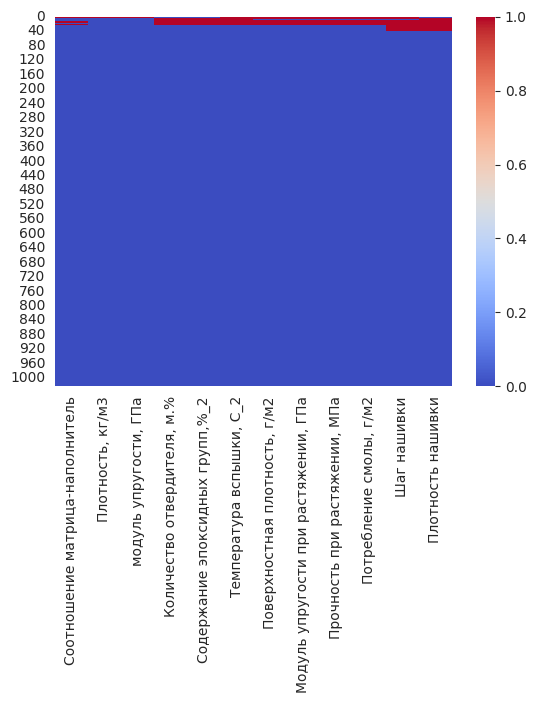

In [ ]:
#Составим диаграмму Тепловая карта
sns.heatmap(df_dupl, cmap='coolwarm')

<Axes: >

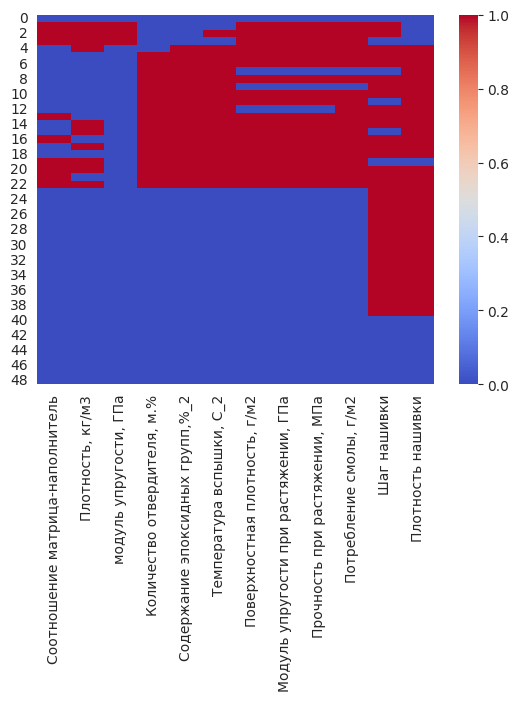

In [ ]:
#Видим, что некоторые данные повторяются в промежутке где-то до 50-й строчки. Составим диаграмму Тепловая карта на данных до 100-й строчки
sns.heatmap(df_dupl[0:49], cmap='coolwarm')

In [ ]:
duplicate_cell =  df.duplicated(df.columns[3])
duplicate_cell

0       False
1       False
2       False
3       False
4       False
        ...  
1018    False
1019    False
1020    False
1021    False
1022    False
Length: 1023, dtype: bool

In [ ]:
#Сохраним первые 22 строчки датасета
df_22 = df.drop(index = df.index[23:1023])
df_22.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                        23.000000         23.000000   
mean                          2.919678       1978.695652   
std                           0.901251         72.256132   
min                           1.598174       1880.000000   
25%                           2.209309       1915.000000   
50%                           2.877358       1980.000000   
75%                           3.544678       2030.000000   
max                           4.897959       2160.000000   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count              23.000000                    23.000000   
mean              738.736842                   111.860000   
std               333.385368                    28.518029   
min               205.000000                    30.000000   
25%               537.500000                   111.860000   
50%               738.736842                   129.000000   
75%               817.000000                   129.000000   
max              1628.000000                   129.000000   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                        23.000000                 23.000000   
mean                         22.267857                284.615385   
std                           2.429067                 40.967325   
min                          21.250000                100.000000   
25%                          21.250000                284.615385   
50%                          21.250000                300.000000   
75%                          22.267857                300.000000   
max                          33.000000                300.000000   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                      23.000000                             23.000000   
mean                      470.000000                             73.333333   
std                       308.868904                              3.162278   
min                       210.000000                             70.000000   
25%                       210.000000                             70.000000   
50%                       380.000000                             73.333333   
75%                       470.000000                             75.000000   
max                      1010.000000                             78.000000   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  Шаг нашивки  \
count                      23.000000                23.000000    23.000000   
mean                     2455.555556               220.000000     6.434783   
std                       496.553780                57.207755     2.727404   
min                      1800.000000               120.000000     0.000000   
25%                      2000.000000               220.000000     4.000000   
50%                      2455.555556               220.000000     7.000000   
75%                      3000.000000               220.000000     9.000000   
max                      3000.000000               300.000000    10.000000   

       Плотность нашивки  Угол нашивки  
count          23.000000     23.000000  
mean           55.956522      0.130435  
std            14.496013      0.344350  
min             0.000000      0.000000  
25%            52.000000      0.000000  
50%            57.000000      0.000000  
75%            60.000000      0.000000  
max            70.000000      1.000000

In [ ]:
# Сохраним итоговый датасет в файл Excel
df.to_excel("/content/gdrive/MyDrive/Colab Notebooks/ВКР/data/X_sum.xlsx")

In [ ]:
# Сохраним датасет c 22-мя значениями в файл в файл Excel
df_22.to_excel("/content/gdrive/MyDrive/Colab Notebooks/ВКР/data/X_sum_22.xlsx")

In [ ]:
# Построим гистограммы распределения каждой из переменных без нормализации и исключения выбросов
df_22.hist(figsize = (25,25), color = "b")
plt.show()

In [ ]:
#Нарисуем попарные графики рассеяния точек
sns.pairplot(df_22[df_22.columns])
plt.show

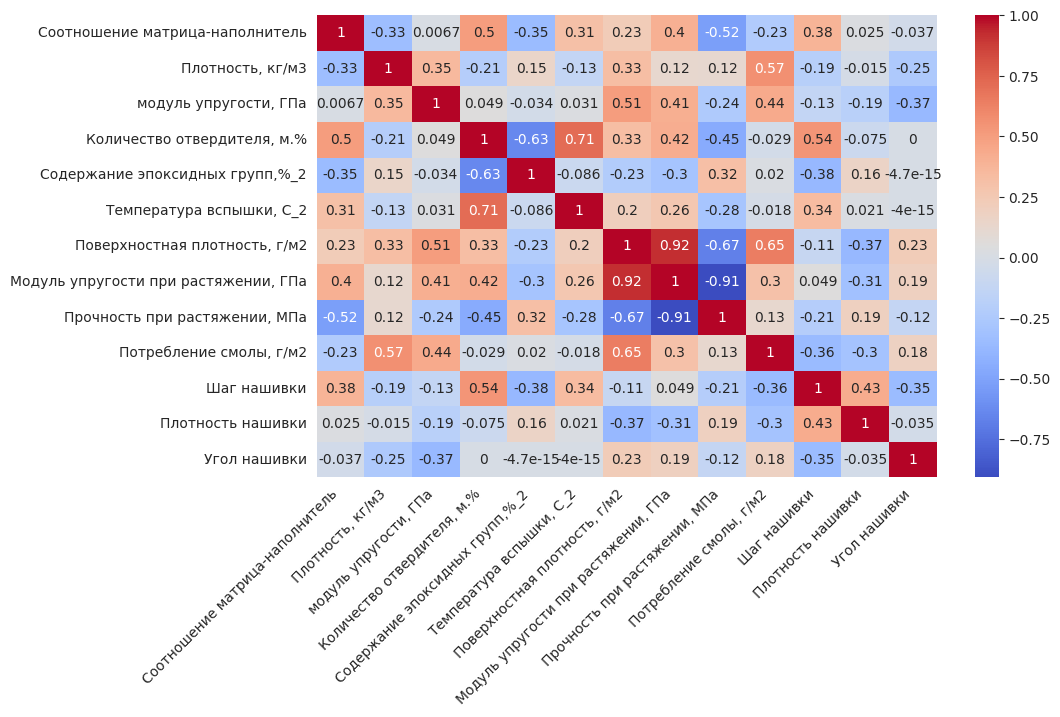

In [ ]:
# Матрица корреляции
correlation_matrix = df_22.corr()
# Выводим признаки на тепловую карту
plt.figure(figsize= (10, 6))
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.show()

2. Построение моделей для прогноза модуля упругости при растяжении и прочности при растяжении

In [ ]:
#Импортируем необходимые библиотеки
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import pickle

In [ ]:
#Разбиваем данные на обучающую и тестовую выборки
X_1 = df_norm.drop(['Модуль упругости при растяжении, ГПа'], axis=1)
X_2 = df_norm.drop(['Прочность при растяжении, МПа'], axis=1)
y_1 = df_norm[['Модуль упругости при растяжении, ГПа']]
y_2 = df_norm[['Прочность при растяжении, МПа']]

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.3, random_state=1)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=1)

print ('Тренировочная часть для Модуля упругости при растяжении: %d столбцов\nТестовая часть для Модуля упругости при растяжении:    : %d столбцов' % (X_train_1.shape[0], X_test_1.shape[0]))
print ('Тренировочная часть для Прочности при растяжении: %d rows\nТестовая часть для Прочности при растяжении    : %d rows' % (X_train_2.shape[0], X_test_2.shape[0]))

Тренировочная часть для Модуля упругости при растяжении: 645 столбцов
Тестовая часть для Модуля упругости при растяжении:    : 277 столбцов
Тренировочная часть для Прочности при растяжении: 645 rows
Тестовая часть для Прочности при растяжении    : 277 rows


In [ ]:
#Выведем минимальное и максимальное значение
for col in df_norm.columns:
    print(f'{col} range :', round(np.min(df_norm[col]),2), "-", round(np.max(df_norm[col]),2))

Соотношение матрица-наполнитель range : 0.0 - 1.0
Плотность, кг/м3 range : 0.0 - 1.0
модуль упругости, ГПа range : 0.0 - 1.0
Количество отвердителя, м.% range : 0.0 - 1.0
Содержание эпоксидных групп,%_2 range : 0.0 - 1.0
Температура вспышки, С_2 range : 0.0 - 1.0
Поверхностная плотность, г/м2 range : 0.0 - 1.0
Модуль упругости при растяжении, ГПа range : 0.0 - 1.0
Прочность при растяжении, МПа range : 0.0 - 1.0
Потребление смолы, г/м2 range : 0.0 - 1.0
Шаг нашивки range : 0.0 - 1.0
Плотность нашивки range : 0.0 - 1.0
Угол нашивки range : 0 - 1


Метод К ближайших соседей

In [ ]:
#Для Модуля упругости при растяжении
# Обучение модели на тренировочных данных
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_1, y_train_1)

# Прогнозирование значений на тестовых данных
y_pred_1 = knn.predict(X_test_1)

# Оценка качества модели
mse = mean_squared_error(y_test_1, y_pred_1)
mae = mean_absolute_error(y_test_1, y_pred_1)
r2 = r2_score(y_test_1, y_pred_1)

print('MSE:', mse)
print('MAE:', mae)
print('R2:', r2)

MSE: 0.04956092554353281
MAE: 0.18191899631434827
R2: -0.2950591869471171


In [ ]:
#Сохраним модель
with open('/content/gdrive/MyDrive/Colab Notebooks/ВКР/knn_pkl.pkl', 'wb') as f:
  pickle.dump(knn, f)

In [ ]:
#Загрузим модель
with open('/content/gdrive/MyDrive/Colab Notebooks/ВКР/knn_pkl.pkl', 'rb') as f:
  load_model = pickle.load(f)

In [ ]:
X_frame_1 = X_test_1[0:1]
X_frame_1

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
827                         0.275971          0.554733                0.06155   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
827                      0.72736                         0.637922   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
827                  0.849159                       0.019718   

     Прочность при растяжении, МПа  Потребление смолы, г/м2  Шаг нашивки  \
827                       0.353659                 0.485873     0.490829   

     Плотность нашивки  Угол нашивки  
827           0.561927             1

In [ ]:
y_predict_1 = load_model.predict(X_frame_1)
y_predict_1

array([[0.58466172]])

In [ ]:
#Инвертирование значений из нормализованных
#Создаем ненормализованные значения 'Модуль упругости при растяжении, ГПа'
y_nonnorm_1 = df[['Модуль упругости при растяжении, ГПа']]
min_max_scaler_1 = MinMaxScaler()
#Нормализуем значения с помощью MinMaxScaler
df_y = pd.DataFrame(min_max_scaler_1.fit_transform(y_nonnorm_1))
#Инвертируем нормализованное предсказанное значение
y_predict_nonnorm1 = min_max_scaler_1.inverse_transform(y_predict_1)
y_predict_nonnorm1

array([[74.94513348]])

<bound method Series.to_frame of Соотношение матрица-наполнитель    0.275971
Плотность, кг/м3                   0.554733
модуль упругости, ГПа              0.061550
Количество отвердителя, м.%        0.727360
Содержание эпоксидных групп,%_2    0.637922
Температура вспышки, С_2           0.849159
Поверхностная плотность, г/м2      0.019718
Прочность при растяжении, МПа      0.353659
Потребление смолы, г/м2            0.485873
Шаг нашивки                        0.490829
Плотность нашивки                  0.561927
Угол нашивки                       1.000000
Name: 827, dtype: float64>

In [ ]:
X_test_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 827 to 667
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Соотношение матрица-наполнитель  277 non-null    float64
 1   Плотность, кг/м3                 277 non-null    float64
 2   модуль упругости, ГПа            277 non-null    float64
 3   Количество отвердителя, м.%      277 non-null    float64
 4   Содержание эпоксидных групп,%_2  277 non-null    float64
 5   Температура вспышки, С_2         277 non-null    float64
 6   Поверхностная плотность, г/м2    277 non-null    float64
 7   Прочность при растяжении, МПа    277 non-null    float64
 8   Потребление смолы, г/м2          277 non-null    float64
 9   Шаг нашивки                      277 non-null    float64
 10  Плотность нашивки                277 non-null    float64
 11  Угол нашивки                     277 non-null    int64  
dtypes: float64(11), int6

In [ ]:
#Запишем получившиеся данные
models = pd.DataFrame()
knr_upr_result = pd.DataFrame({
   'Model': 'KNeighborsRegressor_upr', 
   'MAE': mae, 
   'R2 score': r2.round(3)
}, index=['Модуль упругости при растяжении'])
models = pd.concat([models, knr_upr_result])

In [ ]:
#Для прочности при растяжении
# Обучение модели на тренировочных данных 

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_2, y_train_2)

# Прогнозирование значений на тестовых данных
y_pred_2 = knn.predict(X_test_2)

# Оценка качества модели
mse = mean_squared_error(y_test_2, y_pred_2)
mae = mean_absolute_error(y_test_2, y_pred_2)
r2 = r2_score(y_test_2, y_pred_2)

print('MSE:', mse)
print('MAE:', mae)
print('R2:', r2)



MSE: 0.041224967160805114
MAE: 0.16446308974875512
R2: -0.183311151249419


In [ ]:
#Запишем получившиеся данные
knr_upr_result = pd.DataFrame({
   'Model': 'KNeighborsRegressor_pr', 
   'MAE': mae, 
   'R2 score': r2.round(3)
}, index=['Прочность при растяжении'])
models = pd.concat([models, knr_upr_result])

NameError: ignored

Стохастический градиентный спуск

In [ ]:
##Для Модуля упругости при растяжении
# Создание модели
sgd_1 = SGDRegressor()

# Создание сетки параметров для перебора
param_grid = {
    'loss': ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate' : ['optimal', 'invscaling', 'adaptive'],
    'tol': [0.001, 0.0001, 0.00001]
}

# Создание объекта GridSearchCV
grid = GridSearchCV(sgd_1, param_grid, cv=5, n_jobs=-1)

# Обучение модели на тренировочных данных
grid.fit(X_train_1, y_train_1.values.ravel())

# Вывод наилучших параметров и оценки качества модели

sgd_1 = grid.best_estimator_
print(f'R2-score SGD для модуля упругости при растяжении: {sgd_1.score(X_test_1, y_test_1).round(3)}')
print(mean_absolute_error(y_test_1, sgd_1.predict(X_test_1)))

R2-score SGD для модуля упругости при растяжении: 0.973
0.0528008178744506


In [ ]:
#Запишем данные
sgd_1_result = pd.DataFrame({
   'Model': 'SGDRegressor_upr', 
   'MAE': mean_absolute_error(y_test_1, sgd_1.predict(X_test_1)), 
   'R2 score': sgd_1.score(X_test_1, y_test_1).round(3)
}, index=['Модуль упругости при растяжении'])
models = pd.concat([models, sgd_1_result])

In [ ]:
# Прочность при растяжении
# Создание модели
sgd_2 = SGDRegressor()

# Создание сетки параметров для перебора
param_grid = {
    'loss': ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate' : ['optimal', 'invscaling', 'adaptive'],
    'tol': [0.001, 0.0001, 0.00001]
}

# Создание объекта GridSearchCV
grid = GridSearchCV(sgd_2, param_grid, cv=5, n_jobs=-1)

# Обучение модели на тренировочных данных
grid.fit(X_train_2, y_train_2.values.ravel())

# Вывод наилучших параметров и оценки качества модели

sgd_2 = grid.best_estimator_
print(f'R2-score SGD для модуля прочность при растяжении: {sgd_2.score(X_test_2, y_test_2).round(3)}')
print(mean_absolute_error(y_test_2, sgd_2.predict(X_test_2)))

R2-score SGD для модуля прочность при растяжении: 0.956
0.07032300871379742


In [ ]:
#Запишем данные
sgd_2_result = pd.DataFrame({
   'Model': 'SGDRegressor_pr', 
   'MAE': mean_absolute_error(y_test_2, sgd_2.predict(X_test_2)), 
   'R2 score': sgd_2.score(X_test_2, y_test_2).round(3)
}, index=['Прочность при растяжении'])
models = pd.concat([models, sgd_2_result])

Линейная регрессия

In [ ]:
#Непонятные функции - скорее всего запись данных????
def train_val_1(y_train_1, y_train_1_pred, y_test_1, y_pred_1, model_name):
    
    scores = {model_name+"_train": {"R2" : r2_score(y_train_1, y_train_1_pred),
    "mae" : mean_absolute_error(y_train_1, y_train_1_pred),
    "mse" : mean_squared_error(y_train_1, y_train_1_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train_1, y_train_1_pred))},
    
    model_name+"_test": {"R2" : r2_score(y_test_1, y_pred_1),
    "mae" : mean_absolute_error(y_test_1, y_pred_1),
    "mse" : mean_squared_error(y_test_1, y_pred_1),
    "rmse" : np.sqrt(mean_squared_error(y_test_1, y_pred_1))}}
    
    return pd.DataFrame(scores)

def train_val_2(y_train_2, y_train_2_pred, y_test_2, y_pred_2, model_name):
    
    scores = {model_name+"_train": {"R2" : r2_score(y_train_2, y_train_2_pred),
    "mae" : mean_absolute_error(y_train_2, y_train_2_pred),
    "mse" : mean_squared_error(y_train_2, y_train_2_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train_2, y_train_2_pred))},
    
    model_name+"_test": {"R2" : r2_score(y_test_2, y_pred_2),
    "mae" : mean_absolute_error(y_test_2, y_pred_2),
    "mse" : mean_squared_error(y_test_2, y_pred_2),
    "rmse" : np.sqrt(mean_squared_error(y_test_2, y_pred_2))}}
    
    return pd.DataFrame(scores)


LinearRegression() 

      linear_train  linear_test
R2        0.024226    -0.033837
mae       0.156480     0.161937
mse       0.037617     0.039564
rmse      0.193950     0.198907


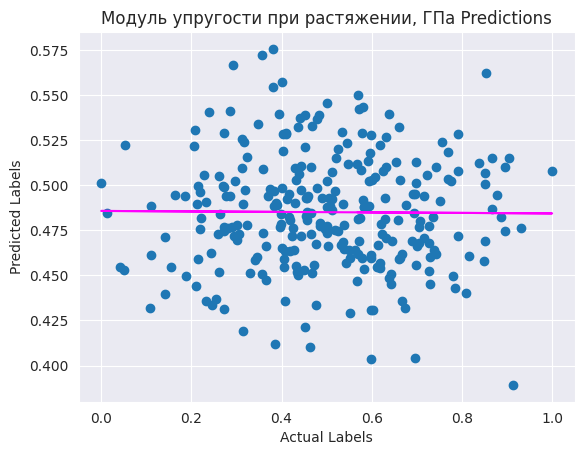

In [ ]:
#Линейная регрессия 1 - Модуль упругости при растяжении

# Fit Linear model on the training set. The model is trained on x_train and y_train.
linear = LinearRegression().fit(X_train_1, y_train_1)
print (linear, "\n")

# Evaluate the model using the test data. The trained model is run on X_test and metrics are retrieved.
y_pred_1 = linear.predict(X_test_1)
y_train_1_pred = linear.predict(X_train_1)
ls =train_val_1(y_train_1, y_train_1_pred, y_test_1, y_pred_1, "linear")
print(ls)

# Plot predicted vs actual
plt.scatter(y_test_1, y_pred_1)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Модуль упругости при растяжении, ГПа Predictions')

# Overlay the regression line
z = np.polyfit(y_test_1.to_numpy().ravel(), pd.DataFrame(y_pred_1).values.ravel(), 1)
p = np.poly1d(z)
plt.plot(y_test_1,p(y_test_1), color='magenta')
plt.show()

y_pred_1 = linear.predict(X_test_1)
linear_R2 = r2_score(y_test_1, y_pred_1)
linear_mae = mean_absolute_error(y_test_1, y_pred_1)
linear_mse = mean_squared_error(y_test_1, y_pred_1)
linear_rmse = np.sqrt(mean_squared_error(y_test_1, y_pred_1))


LinearRegression() 

      linear_train   linear_test
R2    1.000000e+00  1.000000e+00
mae   3.538836e-16  4.549932e-16
mse   2.053222e-31  2.652900e-31
rmse  4.531249e-16  5.150631e-16


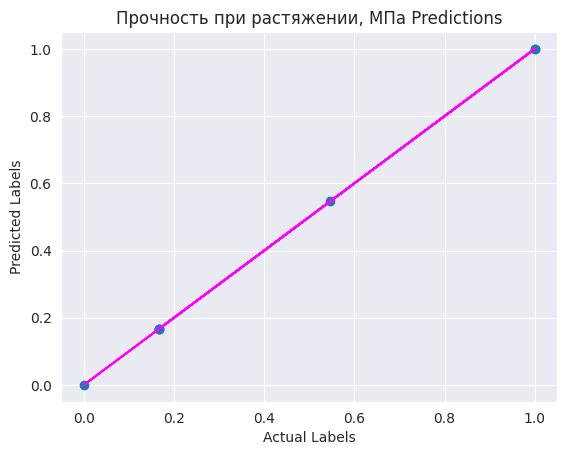

In [ ]:
#линейная регрессия 2 -	Прочность при растяжении, МПа

# Fit Linear model on the training set. The model is trained on x_train and y_train.
linear = LinearRegression().fit(X_train_2, y_train_2)
print (linear, "\n")

# Evaluate the model using the test data. The trained model is run on X_test and metrics are retrieved.
y_pred_2 = linear.predict(X_test_2)
y_train_2_pred = linear.predict(X_train_2)
ls =train_val_2(y_train_2, y_train_2_pred, y_test_2, y_pred_2, "linear")
print(ls)

# Plot predicted vs actual
plt.scatter(y_test_2, y_pred_2)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Прочность при растяжении, МПа Predictions')

# Overlay the regression line
z = np.polyfit(y_test_2.to_numpy().ravel(), pd.DataFrame(y_pred_2).values.ravel(), 1)
p = np.poly1d(z)
plt.plot(y_test_2,p(y_test_2), color='magenta')
plt.show()

y_pred_2 = linear.predict(X_test_2)
linear_R2 = r2_score(y_test_2, y_pred_2)
linear_mae = mean_absolute_error(y_test_2, y_pred_2)
linear_mse = mean_squared_error(y_test_2, y_pred_2)
linear_rmse = np.sqrt(mean_squared_error(y_test_2, y_pred_2))

 Cлучайный лес (Random forest)

In [ ]:
# Создание модели случайного леса для для модуля упругости при растяжении
rf_1 = RandomForestRegressor()

# Создание сетки параметров для перебора
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Создание объекта GridSearchCV
grid = GridSearchCV(rf_1, param_grid, cv=5, n_jobs=-1)

# Обучение модели на тренировочных данных
grid.fit(X_train_1, y_train_1)

# Вывод наилучших параметров и оценки качества модели
rf_1_best = grid.best_estimator_
print(f'R2-score случайного леса: {rf_1_best.score(X_test_1, y_test_1).round(3)}')

R2-score случайного леса: 0.766


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [ ]:
#Выведем получившиеся данные
models_sort = models.sort_values(by=['MAE', 'R2 score'])
models_sort

Построение нейронной сети на Keras для предсказания Модуля упругости при растяжении, Прочности при растяжении, Соотношения матрица-наполнитель

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, Activation, Dropout, LSTM
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)
X_train_1_norm = normalizer.adapt(np.array(X_train_1))

In [ ]:
#Нейронная сеть для прогноза модуля упругости при растяжении
model_1 = Sequential(X_train_1_norm)
model_1.add(Dense(12))
model_1.add(BatchNormalization())
model_1.add(LeakyReLU())
model_1.add(Dense(8))
model_1.add(BatchNormalization())
model_1.add(LeakyReLU())
model_1.add(Dense(1))
model_1.add(Activation(activation='elu'))

In [ ]:
model_1.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False),
    loss='mean_absolute_error')

In [ ]:
#обучаем модель
%%time
history_1 = model_1.fit(
    X_train_1,
    y_train_1,
    batch_size = 64,
    epochs=10,
    verbose=1,
    validation_split = 0.2
    )

Epoch 1/10
9/9 [==============================] - 3s 66ms/step - loss: 0.6049 - val_loss: 0.1770
Epoch 2/10
9/9 [==============================] - 0s 14ms/step - loss: 0.3582 - val_loss: 0.1788
Epoch 3/10
9/9 [==============================] - 0s 24ms/step - loss: 0.2738 - val_loss: 0.1925
Epoch 4/10
9/9 [==============================] - 0s 15ms/step - loss: 0.2249 - val_loss: 0.1888
Epoch 5/10
9/9 [==============================] - 0s 13ms/step - loss: 0.1954 - val_loss: 0.1568
Epoch 6/10
9/9 [==============================] - 0s 12ms/step - loss: 0.1817 - val_loss: 0.1701
Epoch 7/10
9/9 [==============================] - 0s 16ms/step - loss: 0.1779 - val_loss: 0.1561
Epoch 8/10
9/9 [==============================] - 0s 13ms/step - loss: 0.1706 - val_loss: 0.1636
Epoch 9/10
9/9 [==============================] - 0s 14ms/step - loss: 0.1660 - val_loss: 0.1570
Epoch 10/10
9/9 [==============================] - 0s 13ms/step - loss: 0.1625 - val_loss: 0.1569
CPU times: user 3.05 s, sys: 

In [ ]:
# Выводим структуру сети
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 12)                156       
                                                                 
 batch_normalization_2 (Batc  (None, 12)               48        
 hNormalization)                                                 
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 12)                0         
                                                                 
 dense_3 (Dense)             (None, 8)                 104       
                                                                 
 batch_normalization_3 (Batc  (None, 8)                32        
 hNormalization)                                                 
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 8)                

In [ ]:
# Оцениваем обученную модель по тестовой выборке
model_1.evaluate(X_test_1, y_test_1, verbose=1) 

9/9 [==============================] - 0s 3ms/step - loss: 0.1577


0.15773795545101166

In [ ]:
#Функция для построения графика потерь модели на тренировочной и тестовой выборках
def model_loss_plot(model_history):
    plt.figure(figsize=(10, 5))
    plt.plot(model_history.history['loss'])
    plt.plot(model_history.history['val_loss'])
    plt.title('График потерь модели', size=12)
    plt.ylabel('Средняя абсолютная ошибка', size=12)
    plt.xlabel('Эпоха', size=12)
    plt.legend(['loss', 'val_loss'], loc='best')
    plt.show()

#Функция для построения графика оригинального и предсказанного значения у
def actual_and_predicted_plot(original_y, predicted_y):    
    plt.figure(figsize=(10,5))
    plt.title('Тестовые и прогнозные значения', size=12)
    plt.plot(original_y, color='blue', label = 'Тестовые значения')
    plt.plot(predicted_y, color='red', label = 'Прогнозные значения')
    plt.legend(loc='best')
    plt.show()

#Функция для построения точечного графика оригинального и предсказанного значения у   
def actual_and_predicted_scatter(original_y, predicted_y):
    plt.figure(figsize=(10,5))
    plt.title('Рассеяние тестовых и прогнозных значений', size=15)
    plt.scatter(original_y, predicted_y)
    plt.xlabel('Тестовые значения', size=12)
    plt.ylabel('Прогнозные значения', size=12)
    plt.show()

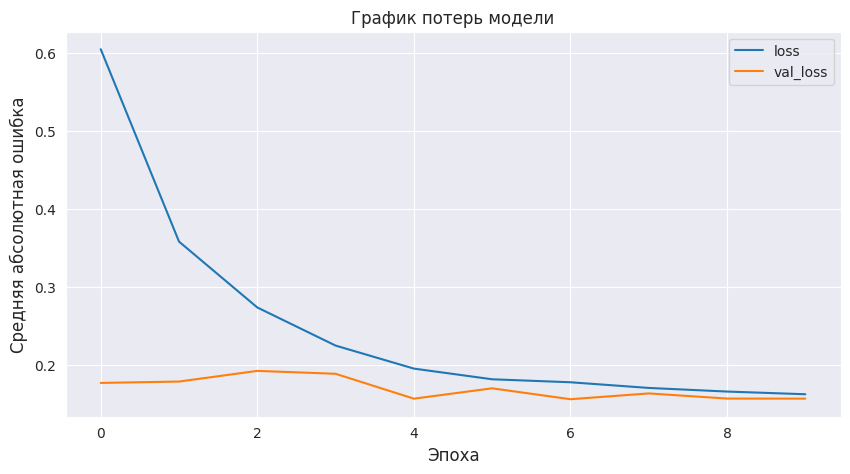

In [ ]:
model_loss_plot(history_1)

9/9 [==============================] - 0s 5ms/step


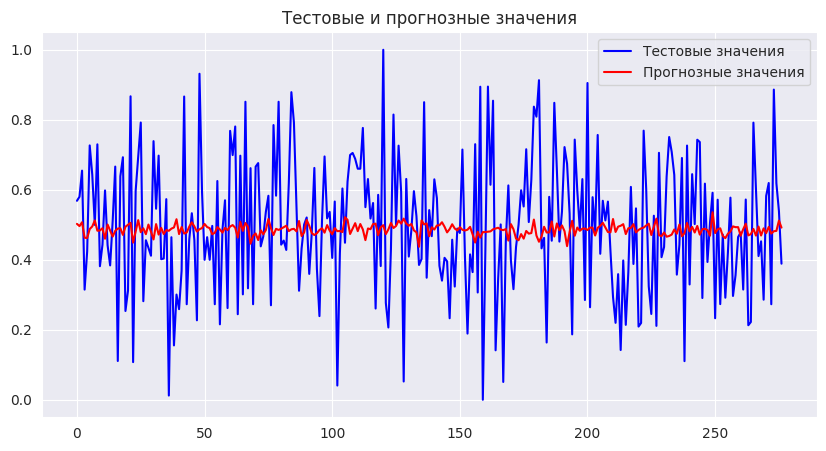

In [ ]:
pred_1 = model_1.predict(np.array((X_test_1)))
original_1 = y_test_1.values

actual_and_predicted_plot(original_1, pred_1)

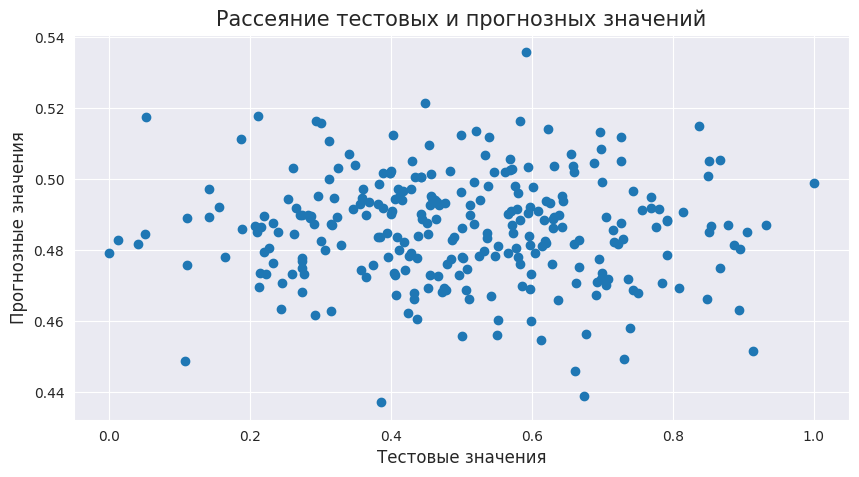

In [ ]:
actual_and_predicted_scatter(original_1, pred_1)

Нейронная сеть для предсказания соотношения матрица-наполнитель

In [ ]:
X_mn = df_norm.drop(['Соотношение матрица-наполнитель'], axis=1)
y_mn = df_norm[['Соотношение матрица-наполнитель']]

X_train_mn, X_test_mn, y_train_mn, y_test_mn = train_test_split(X_mn, y_mn, test_size=0.3, random_state=1)

In [ ]:
X_train_mn_norm = normalizer.adapt(np.array(X_train_mn))

In [ ]:
#Нейронная сеть для прогноза соотношения матрица-наполнитель
model_mn.add(Dense(12))
model_mn.add(BatchNormalization())
model_mn.add(LeakyReLU())
model_mn.add(Dense(144, activation='selu'))
model_mn.add(BatchNormalization())
model_mn.add(Dense(72, activation='selu'))
model_mn.add(BatchNormalization())
model_mn.add(Dense(36, activation='selu'))
model_mn.add(BatchNormalization())
model_mn.add(LeakyReLU())
model_mn.add(Dense(12, activation='selu'))
model_mn.add(BatchNormalization())
model_mn.add(Dense(1))
model_mn.add(Activation('selu'))

In [ ]:
model_mn.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.02, momentum=0.5),
    loss='mean_absolute_error')

In [ ]:
#Создадим объект ранней остановки 
early_mn = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

In [ ]:
%%time
history_mn = model_mn.fit(
    X_train_mn,
    y_train_mn,
    batch_size = 64,
    epochs=40,
    verbose=1,
    validation_split = 0.2,
    callbacks = [early_mn]
    )

Epoch 1/40
9/9 [==============================] - 9s 106ms/step - loss: 0.7600 - val_loss: 1.0840
Epoch 2/40
9/9 [==============================] - 0s 16ms/step - loss: 0.1725 - val_loss: 0.4043
Epoch 3/40
9/9 [==============================] - 0s 17ms/step - loss: 0.1695 - val_loss: 0.3193
Epoch 4/40
9/9 [==============================] - 0s 26ms/step - loss: 0.1564 - val_loss: 0.4985
Epoch 5/40
9/9 [==============================] - 0s 26ms/step - loss: 0.1663 - val_loss: 0.1846
Epoch 6/40
9/9 [==============================] - 0s 25ms/step - loss: 0.1695 - val_loss: 0.2575
Epoch 7/40
9/9 [==============================] - 0s 24ms/step - loss: 0.1737 - val_loss: 0.3047
Epoch 8/40
9/9 [==============================] - 0s 25ms/step - loss: 0.1625 - val_loss: 0.1683
Epoch 9/40
9/9 [==============================] - 0s 27ms/step - loss: 0.1586 - val_loss: 0.2428
Epoch 10/40
9/9 [==============================] - 0s 27ms/step - loss: 0.1576 - val_loss: 0.2567
Epoch 11/40
9/9 [===========

In [ ]:
# Оцениваем обученную модель по тестовой выборке
model_mn.evaluate(X_test_mn, y_test_mn, verbose=1) 

9/9 [==============================] - 0s 5ms/step - loss: 0.1852


0.18517494201660156

In [ ]:
# Выводим структуру сети
model_mn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 12)                156       
                                                                 
 batch_normalization_10 (Bat  (None, 12)               48        
 chNormalization)                                                
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 12)                0         
                                                                 
 dense_15 (Dense)            (None, 8)                 104       
                                                                 
 batch_normalization_11 (Bat  (None, 8)                32        
 chNormalization)                                                
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 8)                

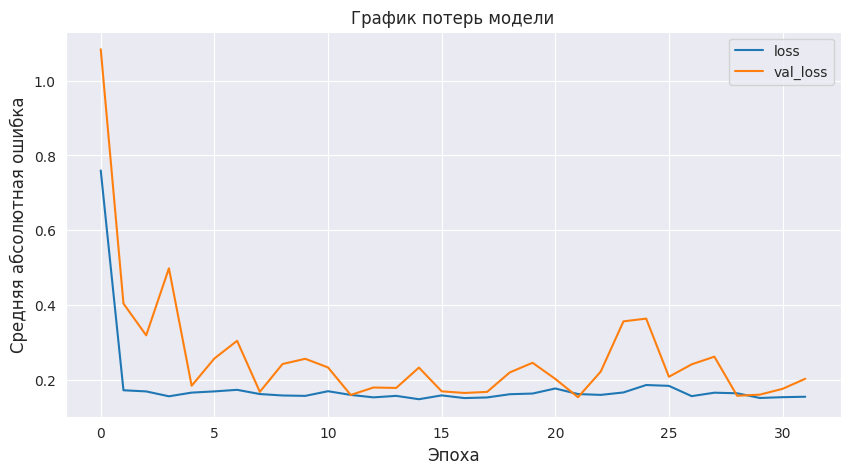

In [ ]:
model_loss_plot(history_mn)

9/9 [==============================] - 1s 4ms/step


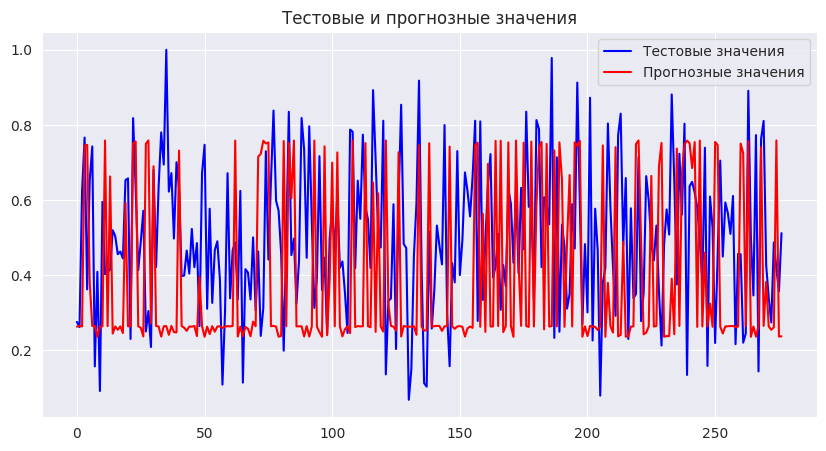

In [ ]:
pred_mn = model_mn.predict(np.array((X_test_mn)))
original_mn = y_test_mn.values

actual_and_predicted_plot(original_mn, pred_mn)

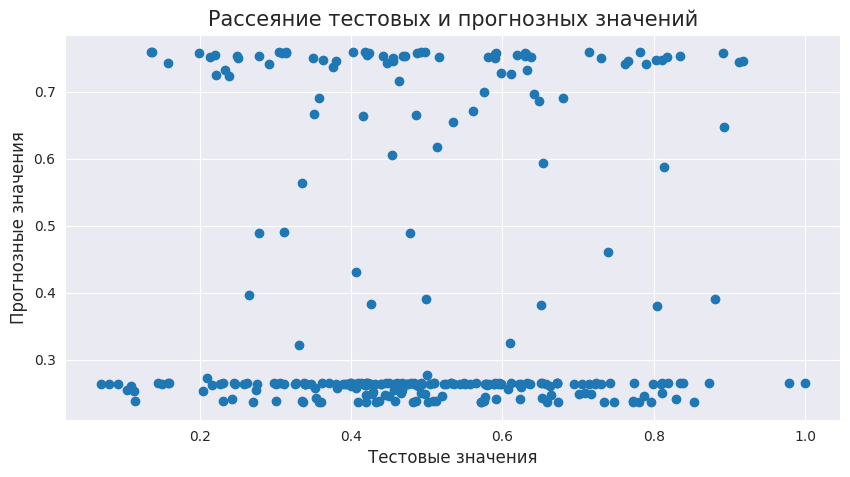

In [ ]:
actual_and_predicted_scatter(original_mn, pred_mn)